In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from datetime import datetime


C:\Users\benna435\AppData\Roaming\Python\Python312\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\benna435\AppData\Roaming\Python\Python312\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\benna435\AppData\Roaming\Python\Python312\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto

In [3]:
import yfinance as yf
import pandas as pd
import time

# ============================================
# 1. ORIGINAL TICKERS (YOUR DOWNLOADED LIST)
# ============================================

tickers = [
"MMM","AOS","ABT","ABBV","ACN","ADBE","AMD","AES","AFL","A","AAP","AMT","AWK",
"AMP","ABC","AME","AMGN","APH","ADI","ANSS","ANTM","AON","APA","AAPL","AMAT",
"APTV","ADM","ANET","AJG","AIZ","T","ATO","ADSK","AZO","AVB","AVY","BKR","BLL",
"BAC","BK","BAX","BDX","BRO","BBWI","BR","BMY","AVGO","BRK-B","CDNS","CZR",
"CPB","COF","CAH","KMX","CCL","CARR","CTLT","CAT","CBOE","CBRE","CDW","CE","CNC",
"CNP","CDAY","CF","CRL","SCHW","CHTR","CVX","CMG","CB","CHD","CI","CINF","CTAS",
"CSCO","C","CFG","CTXS","CLX","CME","CMS","KO","CTSH","CL","CMCSA","CMA","CAG",
"COP","ED","STZ","CEG","COO","CPRT","GLW","CTVA","CSX","CMI","CVS","DHI","DHR",
"DRI","DVA","DE","DAL","XRAY","DVN","DXCM","FANG","DLR","DFS","DIS","DG","DLTR",
"D","DPZ","DOV","DOW","DTE","DUK","DRE","DD","DXC","EMN","ETN","EBAY","ECL",
"EIX","EW","EA","EMR","ENPH","ETR","EOG","EFX","EQIX","EQR","ESS","EL","ETSY",
"RE","EXC","EXPE","EXPD","EXR","XOM","FFIV","FDS","FIS","FITB","FE","FRC","FISV",
"FLT","FMC","F","FTNT","FTV","FBHS","FOXA","FOX","BEN","FCX","GRMN","IT","GNRC",
"GD","GE","GIS","GM","GPC","GILD","GPN","GL","GS","HAL","HIG","HAS","HCA","PEAK",
"HSIC","HSY","HES","HPE","HLT","HOLX","HD","HON","HRL","HST","HWM","HPQ","HUM",
"HBAN","HII","IBM","IEX","IDXX","ITW","ILMN","INCY","IR","INTC","ICE","IFF","IP",
"IPG","INTU","ISRG","IVZ","IPGP","IQV","IRM","JBHT","J","SJM","JNJ","JCI","JPM",
"JNPR","K","KEY","KEYS","KMB","KIM","KMI","KLAC","KHC","KR","LHX","LH","LRCX",
"LW","LVS","LDOS","LEN","LLY","LNC","LIN","LYV","LKQ","LMT","L","LOW","LUMN",
"LYB","MTB","MRO","MPC","MKTX","MAR","MMC","MLM","MAS","MA","MTCH","MKC","MCD",
"MCK","MDT","MRK","META","MTD","MGM","MCHP","MU","MSFT","MAA","MRNA","MHK","TAP",
"MDLZ","MPWR","MNST","MCO","MS","MOS","MSI","MSCI","NDAQ","NTAP","NFLX","NWL",
"NEM","NWSA","NWS","NEE","NLSN","NKE","NI","NSC","NTRS","NOC","NLOK","NVR","NXPI",
"ORLY","OXY","ODFL","OMC","OKE","ORCL","OGN","OTIS","PCAR","PKG","PH","PAYX",
"PAYC","PFE","PM","PSX","PNW","PXD","PNC","POOL","PPG","PPL","PFG","PG","PGR",
"PLD","PRU","PEG","PSA","PHM","PVH","QRVO","QCOM","DGX","RL","ROP","ROST","RCL",
"SPGI","CRM","SBAC","SLB","STX","SEE","SRE","SHW","SPG","SWKS","SNA","SO","LUV",
"SWK","SBUX","STT","STE","SYK","SIVB","SYF","SNPS","SYY","TMUS","TROW","TT","TDY",
"TFX","TER","TSLA","TXN","TXT","TMO","TJX","TSCO","TTWO","TDG","TRV","TRMB",
"TFC","TWTR","TYL","TSN","UDR","ULTA","USB","UAA","UA","UNP","UAL","UPS","URI",
"UNH","UHS","VFC","VTR","VTRS","VICI","VZ","V","VMW","VNO","VMC","WRB","WAB",
"WMT","WBA","DIS","WM","WAT","WEC","WFC","WELL","WDC","WHR","WMB","WLTW","WYNN",
"XEL","XLNX","XYL","YUM","ZBRA","ZBH","ZION","ZTS"
]


# ============================================
# 2. FIX MAP (RENAME BROKEN TICKERS)
# ============================================

ticker_fix = {
    "ABC": "COR",     # AmerisourceBergen → Cencora
    "ANTM": "ELV",    # Anthem → Elevance Health
    "BLL": "BALL",    # Ball Corp
    "CDAY": "DAY",    # Ceridian → Dayforce
    "FLT": "CORP",    # renamed to CORP
    "FBHS": "FBIN",   # Fortune Brands
    "PEAK": "DOC",    # merged → Physicians Realty
    "RE": "EG",       # renamed
    "NLOK": "GEN",    # Norton → Gen Digital
    "WLTW": "WTW",    # Willis Towers Watson → WTW
}

# ============================================
# 3. REMOVE LIST (DELISTED / MERGED / DEAD)
# ============================================

remove_list = [
    "ANSS","CTLT","CTXS","DFS","DRE","FRC","HES","JNPR","MRO",
    "NLSN","PXD","SIVB","TWTR","VMW","WBA","XLNX"
]


# ============================================
# 4. CLEAN FINAL TICKER LIST
# ============================================

cleaned_tickers = []
for t in tickers:
    if t in remove_list:
        continue
    cleaned_tickers.append(ticker_fix.get(t, t))

len(cleaned_tickers)


404

In [4]:
all_data = {}
start_date = "2000-01-01"
failed = []

for t in cleaned_tickers:
    try:
        print("Downloading:", t)
        df = yf.download(t, start=start_date, auto_adjust=True, progress=False)

        # require enough history
        if df.shape[0] < 4000:
            raise Exception("Insufficient history")

        all_data[t] = df["Close"]
    except Exception as e:
        print("FAILED:", t, e)
        failed.append(t)
    
    time.sleep(0.10)  # avoid rate limit

print("\nSuccess:", len(all_data), "stocks")
print("Failed:", len(failed), failed)


Downloading: MMM
Downloading: AOS
Downloading: ABT
Downloading: ABBV
FAILED: ABBV Insufficient history
Downloading: ACN
Downloading: ADBE
Downloading: AMD
Downloading: AES
Downloading: AFL
Downloading: A
Downloading: AAP
Downloading: AMT
Downloading: AWK
Downloading: AMP
Downloading: COR
Downloading: AME
Downloading: AMGN
Downloading: APH
Downloading: ADI
Downloading: ELV
Downloading: AON
Downloading: APA
Downloading: AAPL
Downloading: AMAT
Downloading: APTV
FAILED: APTV Insufficient history
Downloading: ADM
Downloading: ANET
FAILED: ANET Insufficient history
Downloading: AJG
Downloading: AIZ
Downloading: T
Downloading: ATO
Downloading: ADSK
Downloading: AZO
Downloading: AVB
Downloading: AVY
Downloading: BKR
Downloading: BALL
Downloading: BAC
Downloading: BK
Downloading: BAX
Downloading: BDX
Downloading: BRO
Downloading: BBWI
Downloading: BR
Downloading: BMY
Downloading: AVGO
Downloading: BRK-B
Downloading: CDNS
Downloading: CZR
FAILED: CZR Insufficient history
Downloading: CPB
Downloa

In [5]:
import numpy as np
import pandas as pd

# ============================================================
# CONFIG
# ============================================================
WINDOW  = 60
HORIZON = 60
EPS     = 1e-8

tickers = list(all_data.keys())
ticker_to_id = {t: i for i, t in enumerate(tickers)}


# ============================================================
# UNIVERSAL PRICE EXTRACTOR
# ============================================================
def extract_price(df, ticker):

    if isinstance(df.columns, pd.MultiIndex):
        level0 = df.columns.get_level_values(0)

        if "Close" in level0:
            close_cols = [c for c in df.columns if c[0] == "Close"]

            if len(close_cols) == 1:
                price = df[close_cols[0]]
            else:
                match = [c for c in close_cols if c[1] == ticker]
                if len(match) == 1:
                    price = df[match[0]]
                else:
                    price = df[close_cols[0]]
        else:
            price = df.iloc[:, 0]

    else:
        if "Close" in df.columns:
            price = df["Close"]
        elif "Adj Close" in df.columns:
            price = df["Adj Close"]
        else:
            price = df.iloc[:, 0]

    return price.rename("price").dropna()


# ============================================================
# STEP 1 — BUILD RAW X, raw y, stock_ids, dates  (FINAL FIXED)
# ============================================================
X_list      = []
y_list      = []
ids_list    = []
dates_list  = []

for t in tickers:

    price = extract_price(all_data[t], t)
    prices = price.values
    dates  = price.index

    # FIXED: correct number of valid windows
    max_i = len(prices) - (WINDOW + HORIZON + 1)
    if max_i < 0:
        continue

    for i in range(max_i + 1):

        window = prices[i : i + WINDOW]

        current_price = prices[i + WINDOW - 1]
        future_price  = prices[i + WINDOW + HORIZON]  # <-- now ALWAYS valid

        future_return = (future_price - current_price) / (current_price + EPS)

        X_list.append(window)
        y_list.append(future_return)
        ids_list.append(ticker_to_id[t])
        dates_list.append(dates[i + WINDOW])



# Convert to arrays (all perfectly aligned)
X         = np.array(X_list)
y         = np.array(y_list)
stock_ids = np.array(ids_list)
dates_arr = np.array(dates_list)

print("X:",      X.shape)
print("y:",      y.shape)
print("stock_ids:", stock_ids.shape)
print("dates:",  len(dates_arr))


# ============================================================
# STEP 2 — CONVERT y → CONTINUOUS DAILY RANK (0–1)
# ============================================================

df_tmp = pd.DataFrame({
    "date": dates_arr,
    "y":    y
})

# Rank within each date only (safe)
df_tmp["rank"] = df_tmp.groupby("date")["y"].rank(method="dense", pct=True)

y_rank = df_tmp["rank"].values.astype(np.float32)

print("\nRanked y distribution:")
print(pd.Series(y_rank).describe())


# ============================================================
# STEP 3 — TRAIN / VAL / TEST SPLIT
# ============================================================

dates_pd = pd.to_datetime(dates_arr)

train_mask = dates_pd <  pd.Timestamp("2020-01-01")

# Validation extended by 1 year → 2016–2020
val_mask   = (dates_pd >= pd.Timestamp("2020-01-01")) & (dates_pd < pd.Timestamp("2024-01-01"))

# Test now begins 2020+
test_mask  = dates_pd >= pd.Timestamp("2024-01-01")

# X splits
X_train = X[train_mask]
X_val   = X[val_mask]
X_test  = X[test_mask]

# y_rank splits
y_train = y_rank[train_mask]
y_val   = y_rank[val_mask]
y_test  = y_rank[test_mask]

# IDs & dates
ids_train  = stock_ids[train_mask]
ids_val    = stock_ids[val_mask]
ids_test   = stock_ids[test_mask]

dates_train = dates_pd[train_mask]
dates_val   = dates_pd[val_mask]
dates_test  = dates_pd[test_mask]

print("\nTrain:", X_train.shape)
print("Val:  ",  X_val.shape)
print("Test: ",  X_test.shape)


# ============================================================
# STEP 4 — NORMALIZATION PER WINDOW
# ============================================================
def normalize_window(w):
    mu = w.mean()
    sd = w.std() + 1e-6
    return (w - mu) / sd

X_train = np.array([normalize_window(w) for w in X_train])
X_val   = np.array([normalize_window(w) for w in X_val])
X_test  = np.array([normalize_window(w) for w in X_test])


# ============================================================
# STEP 5 — RESHAPE FOR LSTM
# ============================================================
X_train = X_train[..., None]
X_val   = X_val[..., None]
X_test  = X_test[..., None]

print("\nFinal LSTM shapes:")
print("Train:", X_train.shape)
print("Val:  ", X_val.shape)
print("Test: ", X_test.shape)
print("\ny-rank shapes:", y_train.shape, y_val.shape, y_test.shape)


X: (2179812, 60)
y: (2179812,)
stock_ids: (2179812,)
dates: 2179812

Ranked y distribution:
count    2.179812e+06
mean     5.014651e-01
std      2.886724e-01
min      2.849003e-03
25%      2.507122e-01
50%      5.014245e-01
75%      7.521368e-01
max      1.000000e+00
dtype: float64

Train: (1680691, 60)
Val:   (353106, 60)
Test:  (146015, 60)

Final LSTM shapes:
Train: (1680691, 60, 1)
Val:   (353106, 60, 1)
Test:  (146015, 60, 1)

y-rank shapes: (1680691,) (353106,) (146015,)


In [6]:
df_tmp

,date,y,rank
0,2000-03-29,-0.043772,0.327645
1,2000-03-30,-0.017926,0.378840
2,2000-03-31,-0.020377,0.378840
3,2000-04-03,-0.021753,0.382253
4,2000-04-04,-0.062671,0.310580
...,...,...,...
2179807,2025-08-22,-0.077694,0.304843
2179808,2025-08-25,-0.109077,0.253561
2179809,2025-08-26,-0.090209,0.304843
2179810,2025-08-27,-0.104602,0.273504


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ======================================================
# 1. MODEL: Rank Regression (predict continuous 0–1 rank)
# ======================================================

model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(WINDOW, 1)),
    Dropout(0.30),

    Dense(32, activation='relu'),
    Dropout(0.20),

    Dense(1, activation='sigmoid')   # --> predicts rank (0..1)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='mse',          # rank regression loss
    metrics=['mae']
)

model.summary()


# ======================================================
# 2. CALLBACKS
# ======================================================

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)

lr_schedule = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-5
)


# ======================================================
# 3. TRAIN MODEL
# ======================================================

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=2048,
    callbacks=[early_stop, lr_schedule],
    verbose=1
)


# ======================================================
# 4. EVALUATE MODEL
# ======================================================

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

print("\n===== TEST METRICS =====")
print(f"Test MSE: {test_loss:.6f}")
print(f"Test MAE: {test_mae:.6f}")


# ======================================================
# 5. PREDICT RANKS
# ======================================================

rank_pred_test = model.predict(
    X_test,
    batch_size=4096,
    verbose=1
).reshape(-1)

print("Predictions shape:", rank_pred_test.shape)
print("\nSample predicted ranks:", rank_pred_test[:20])


C:\Users\benna435\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,009 (74.25 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
821/821 ━━━━━━━━━━━━━━━━━━━━ 189s 225ms/step - loss: 0.0833 - mae: 0.2499 - val_loss: 0.0833 - val_mae: 0.2499 - learning_rate: 0.0010
Epoch 2/30
821/821 ━━━━━━━━━━━━━━━━━━━━ 73s 89ms/step - loss: 0.0833 - mae: 0.2499 - val_loss: 0.0833 - val_mae: 0.2499 - learning_rate: 0.0010
Epoch 3/30
821/821 ━━━━━━━━━━━━━━━━━━━━ 84s 102ms/step - loss: 0.0833 - mae: 0.2499 - val_loss: 0.0833 - val_mae: 0.2499 - learning_rate: 0.0010
Epoch 4/30
821/821 ━━━━━━━━━━━━━━━━━━━━ 92s 112ms/step - loss: 0.0833 - mae: 0.2499 - val_loss: 0.0833 - val_mae: 0.2499 - learning_rate: 5.0000e-04
Epoch 5/30
821/821 ━━━━━━━━━━━━━━━━━━━━ 100s 122ms/step - loss: 0.0833 - mae: 0.2499 - val_loss: 0.0833 - val_mae: 0.2499 - learning_rate: 5.0000e-04
Epoch 6/30
821/821 ━━━━━━━━━━━━━━━━━━━━ 95s 116ms/step - loss: 0.0833 - mae: 0.2499 - val_loss: 0.0833 - val_mae: 0.2499 - learning_rate: 2.5000e-04
Epoch 7/30
821/821 ━━━━━━━━━━━━━━━━━━━━ 95s 116ms/step - loss: 0.0833 - mae: 0.2498 - val_loss: 0.0833 - val_mae: 0.2

# Now the backtesting starts


===== CORRECTED TRADING-DAY BACKTEST =====
Start: 2024-1-13
Rebalances: 6
Final Model Return: 1.251138442172483
Final SPY Return:   1.298593930956681
Avg #stocks: 12.0


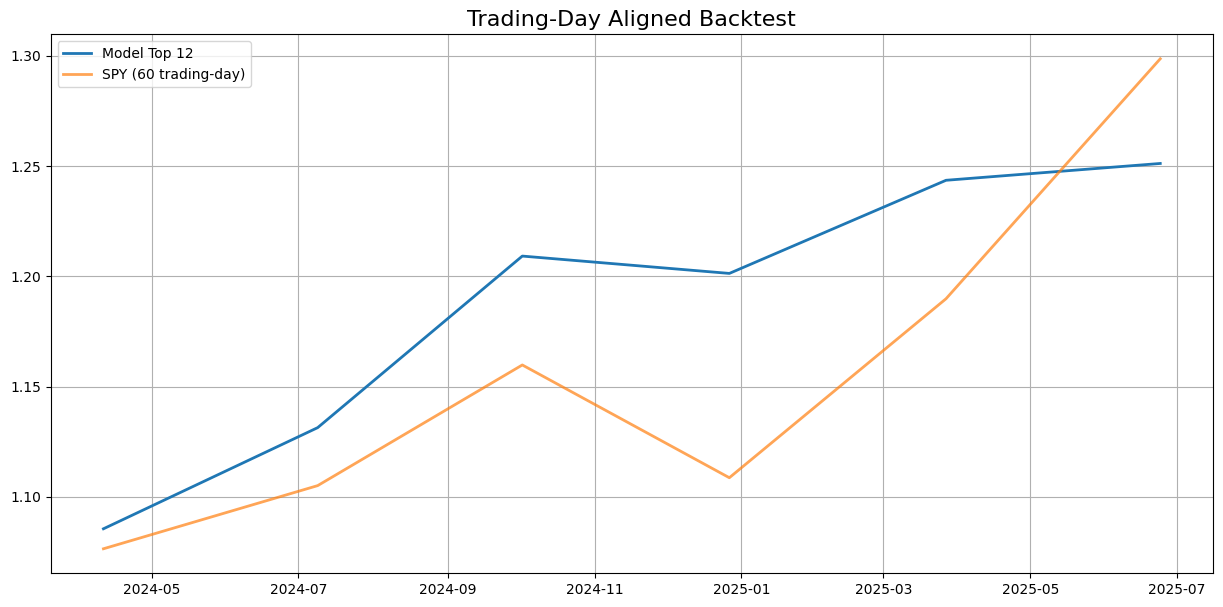

In [32]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# ============================================================
# CONFIG
# ============================================================

H = HORIZON            # 60 TRADING DAYS
TOP_K = 12
BACKTEST_START = "2024-1-13"


# ============================================================
# 1) BUILD CLEAN TEST DATAFRAME (ALIGNED WITH TRAINING)
# ============================================================

df = pd.DataFrame({
    "date": dates_test,
    "stock_id": ids_test,
    "y_pred": rank_pred_test,
    "true_return": y[test_mask]          # <-- 60 trading-day REAL return
})

df = df.dropna().reset_index(drop=True)
df["date"] = pd.to_datetime(df["date"])

# Add ticker names
df["ticker"] = np.array(tickers)[df["stock_id"].values]


# ============================================================
# 2) APPLY CUSTOM START DATE
# ============================================================

df = df[df["date"] >= pd.Timestamp(BACKTEST_START)].reset_index(drop=True)

test_dates = np.sort(df["date"].unique())      # trading days only


# ============================================================
# 3) SPY 60-TRADING-DAY RETURNS
# ============================================================

spy = yf.download("SPY", start="1990-01-01", progress=False, auto_adjust=True)

if isinstance(spy.columns, pd.MultiIndex):
    spy_close = spy["Close"].iloc[:, 0]
else:
    spy_close = spy["Close"]

spy = pd.DataFrame({"Close": spy_close})

# SPY trading days
spy_dates = spy.index.to_list()

# 60 trading-day forward price
spy["forward"] = spy["Close"].shift(-H)
spy["ret"] = (spy["forward"] - spy["Close"]) / spy["Close"]


# ============================================================
# 4) WALK-FORWARD BACKTEST (TRADING-DAY ALIGNED)
# ============================================================

portfolio_dates = []
portfolio_returns = []
portfolio_n = []
spy_returns = []

i = 0
while True:

    if i >= len(test_dates):
        break

    t0 = test_dates[i]         # rebalance date (trading day index)
    idx0 = np.where(test_dates == t0)[0][0]

    idx1 = idx0 + H            # 60 trading days later

    if idx1 >= len(test_dates):
        break

    t1 = test_dates[idx1]      # the REAL realization date

    # ---- MODEL RETURN ----
    df_t = df[df["date"] == t0].sort_values("y_pred", ascending=False).head(TOP_K)

    realized = df_t["true_return"].mean()
    nstocks  = df_t.shape[0]

    portfolio_dates.append(t1)
    portfolio_returns.append(realized)
    portfolio_n.append(nstocks)

    # ---- SPY RETURN (MATCH TRADING DAY OFFSET) ----
    if t0 in spy.index:
        spy_idx0 = spy.index.get_loc(t0)
        spy_idx1 = spy_idx0 + H
        if spy_idx1 < len(spy):
            spy_returns.append(float(spy["ret"].iloc[spy_idx1]))
        else:
            spy_returns.append(np.nan)
    else:
        spy_returns.append(np.nan)

    i += H   # move forward 60 TRADING DAYS


# ============================================================
# 5) BUILD RESULT DF
# ============================================================

df_port = pd.DataFrame({
    "date": portfolio_dates,
    "model_return": portfolio_returns,
    "spy_return": spy_returns,
    "nstocks": portfolio_n
}).dropna().reset_index(drop=True)

df_port["cum_model"] = (1 + df_port["model_return"]).cumprod()
df_port["cum_spy"]   = (1 + df_port["spy_return"]).cumprod()


# ============================================================
# 6) PRINT SUMMARY
# ============================================================

print("\n===== CORRECTED TRADING-DAY BACKTEST =====")
print("Start:", BACKTEST_START)
print("Rebalances:", len(df_port))
print("Final Model Return:", df_port['cum_model'].iloc[-1])
print("Final SPY Return:  ", df_port['cum_spy'].iloc[-1])
print("Avg #stocks:", df_port['nstocks'].mean())


# ============================================================
# 7) PLOT
# ============================================================

plt.figure(figsize=(15,7))
plt.plot(df_port["date"], df_port["cum_model"], label=f"Model Top {TOP_K}", linewidth=2)
plt.plot(df_port["date"], df_port["cum_spy"],   label="SPY (60 trading-day)", linewidth=2, alpha=0.7)
plt.title("Trading-Day Aligned Backtest", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()


In [17]:
# ===== PRINT TOP 5 PREDICTED STOCKS PER REBALANCE =====

print("===== TOP 5 PREDICTIONS PER REBALANCE =====")

# ensure ticker exists
if "ticker" not in df.columns:
    df["ticker"] = np.array(tickers)[df["stock_id"].values]

i = 0
while i < len(test_dates):

    t0 = test_dates[i]
    t1 = t0 + pd.Timedelta(days=HORIZON)

    if t1 > test_dates[-1]:
        break

    df_t = df[df["date"] == t0].sort_values("y_pred", ascending=False).head(TOP_K)

    # safety check
    if "ticker" not in df_t.columns:
        raise RuntimeError("ticker column missing in df_t")

    tickers_top5 = df_t["ticker"].tolist()

    print(f"\nRebalance date: {pd.Timestamp(t0).date()}")
    print("Top 5 predicted stocks:", tickers_top5)

    i += HORIZON


===== TOP 5 PREDICTIONS PER REBALANCE =====

Rebalance date: 2024-01-02
Top 5 predicted stocks: ['HUM', 'XOM', 'HAL', 'PFE', 'APA', 'SLB', 'AON', 'EXC', 'J', 'BMY', 'HRL', 'EOG', 'LLY', 'EG', 'NOC']

Rebalance date: 2024-03-28
Top 5 predicted stocks: ['ADBE', 'MDLZ', 'KIM', 'INCY', 'VFC', 'VTR', 'AAPL', 'NKE', 'DXC', 'SPGI', 'XRAY', 'LH', 'HUM', 'XEL', 'TFX']

Rebalance date: 2024-06-25
Top 5 predicted stocks: ['XRAY', 'KR', 'DLTR', 'EL', 'ZBH', 'DXCM', 'LUMN', 'CE', 'WYNN', 'HOLX', 'MNST', 'POOL', 'MLM', 'HAL', 'GPN']

Rebalance date: 2024-09-19
Top 5 predicted stocks: ['HUM', 'OXY', 'DVN', 'HAL', 'EL', 'MU', 'MCK', 'SLB', 'BBWI', 'SWKS', 'LRCX', 'APA', 'MCHP', 'SNPS', 'DLTR']

Rebalance date: 2024-12-13
Top 5 predicted stocks: ['DVN', 'LEN', 'JNJ', 'BAX', 'DHI', 'COO', 'LMT', 'MDLZ', 'AMD', 'HOLX', 'NVR', 'LIN', 'UHS', 'MCHP', 'PHM']

Rebalance date: 2025-03-14
Top 5 predicted stocks: ['HST', 'ROST', 'TER', 'USB', 'TROW', 'ULTA', 'GPN', 'DLR', 'PVH', 'FDS', 'JBHT', 'CMG', 'KIM', 'MSC

In [12]:
print("\n===== FIRST PERIOD RETURN =====")
print("t0:", df_port['date'].iloc[0])
print("Model first return:", df_port['model_return'].iloc[0])
print("SPY first return:", df_port['spy_return'].iloc[0])



===== FIRST PERIOD RETURN =====
t0: 2024-04-09 00:00:00
Model first return: 0.08313268748155367
SPY first return: 0.07145751930869777



===== DAILY FORWARD SHARPE + RETURN STABILITY =====

--- MODEL PERFORMANCE STABILITY ---
Mean return (avg across offsets): 0.03910624615414874
Std of returns (avg across offsets): 0.0625641143420003
Mean Sharpe: 0.6553169538211655
Std Sharpe : 0.4372127821991883
Sharpe min : -0.32269901102963566
Sharpe max : 1.8300521191055266
Stability (Sharpe mean/std): 1.4988513156532397

--- SPY BASELINE (ALIGNED) ---
SPY mean return: 0.047117459538294625
SPY std return : 0.06536558000346436
SPY Sharpe     : nan


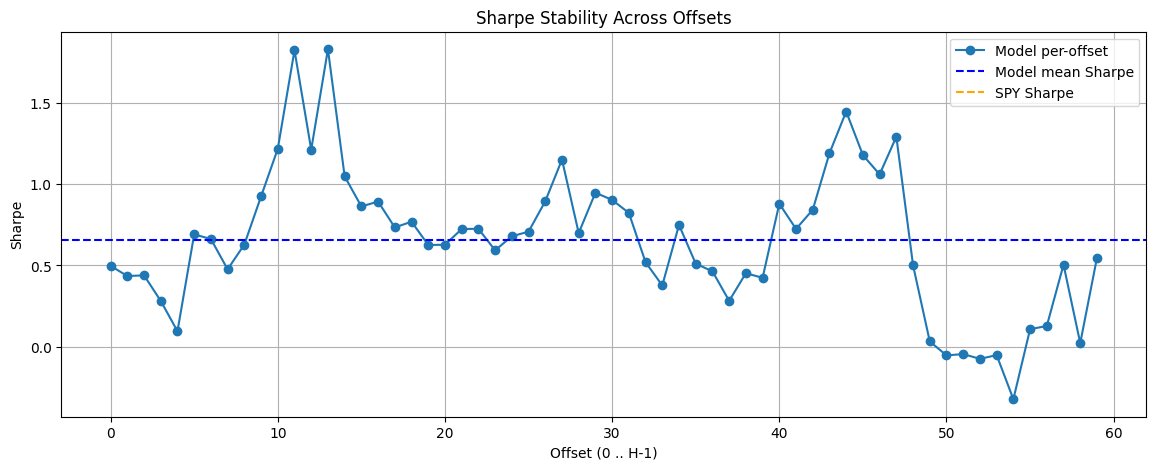

In [18]:
# ============================================================
# 8) DAILY FORWARD SHARPE + RETURN STABILITY EVALUATION
# ============================================================

print("\n===== DAILY FORWARD SHARPE + RETURN STABILITY =====")

def compute_sharpe(r):
    r = np.array(r)
    if len(r) < 2:
        return np.nan
    return r.mean() / (r.std() + 1e-12)

# ============================================================
# PREP MODEL DATA
# ============================================================

df_daily = pd.DataFrame({
    "date": dates_test,
    "stock_id": ids_test,
    "y_pred": rank_pred_test,
    "true_return": y[test_mask]
}).dropna().reset_index(drop=True)

df_daily["date"] = pd.to_datetime(df_daily["date"])
df_daily["ticker"] = np.array(tickers)[df_daily["stock_id"].values]
df_daily = df_daily.sort_values(["date", "y_pred"], ascending=[True, False])

unique_test_dates = np.sort(df_daily["date"].unique())

# ============================================================
# PREP SPY RETURNS ALIGNED WITH MODEL DATES
# ============================================================

spy_aligned = []
for d in unique_test_dates:
    if d in spy.index:
        idx0 = spy.index.get_loc(d)
        idx1 = idx0 + H
        if idx1 < len(spy):
            spy_aligned.append(float(spy["ret"].iloc[idx1]))

spy_aligned = np.array(spy_aligned)

# ============================================================
# LOOP OVER OFFSETS
# ============================================================

offset_sharpe_model = []
offset_mean_model = []
offset_std_model = []

for offset in range(H):

    model_period_ret = []

    i = offset
    while i < len(unique_test_dates):

        t0 = unique_test_dates[i]
        idx1 = i + H
        if idx1 >= len(unique_test_dates):
            break

        df_t = df_daily[df_daily["date"] == t0].head(TOP_K)
        model_period_ret.append(float(df_t["true_return"].mean()))

        i += H

    model_period_ret = np.array(model_period_ret)

    offset_mean_model.append(model_period_ret.mean())
    offset_std_model.append(model_period_ret.std())
    offset_sharpe_model.append(compute_sharpe(model_period_ret))

offset_mean_model = np.array(offset_mean_model)
offset_std_model = np.array(offset_std_model)
offset_sharpe_model = np.array(offset_sharpe_model)

# ============================================================
# PRINT MODEL RESULTS
# ============================================================

print("\n--- MODEL PERFORMANCE STABILITY ---")
print("Mean return (avg across offsets):", np.nanmean(offset_mean_model))
print("Std of returns (avg across offsets):", np.nanmean(offset_std_model))
print("Mean Sharpe:", np.nanmean(offset_sharpe_model))
print("Std Sharpe :", np.nanstd(offset_sharpe_model))
print("Sharpe min :", np.nanmin(offset_sharpe_model))
print("Sharpe max :", np.nanmax(offset_sharpe_model))
print("Stability (Sharpe mean/std):",
      np.nanmean(offset_sharpe_model) / (np.nanstd(offset_sharpe_model) + 1e-12))

# ============================================================
# PRINT SPY BASELINE
# ============================================================

print("\n--- SPY BASELINE (ALIGNED) ---")
print("SPY mean return:", np.nanmean(spy_aligned))
print("SPY std return :", np.nanstd(spy_aligned))
print("SPY Sharpe     :", compute_sharpe(spy_aligned))

# ============================================================
# PLOT SHARPE VS OFFSET
# ============================================================

plt.figure(figsize=(14,5))
plt.plot(offset_sharpe_model, marker="o", label="Model per-offset")
plt.axhline(np.nanmean(offset_sharpe_model), color="blue", linestyle="--", label="Model mean Sharpe")
plt.axhline(compute_sharpe(spy_aligned), color="orange", linestyle="--", label="SPY Sharpe")
plt.title("Sharpe Stability Across Offsets")
plt.xlabel("Offset (0 .. H-1)")
plt.ylabel("Sharpe")
plt.grid(True)
plt.legend()
plt.show()



===== DAILY FORWARD SHARPE + RETURN STABILITY =====

--- MODEL PERFORMANCE STABILITY ---
Mean return (avg across offsets): 0.03910624615414874
Std of returns (avg across offsets): 0.0625641143420003
Mean Sharpe: 0.6553169538211655
Std Sharpe : 0.4372127821991883
Sharpe min : -0.32269901102963566
Sharpe max : 1.8300521191055266
Stability (Sharpe mean/std): 1.4988513156532397

--- SPY BASELINE (ALIGNED) ---
SPY mean return: 0.04711746181803963
SPY std return : 0.06536557998212884
SPY Sharpe     : nan

===== CUMULATIVE RETURNS (OFFSET 0) =====
Model cumulative return: 1.389615526117847
SPY cumulative return:   1.377817471419352


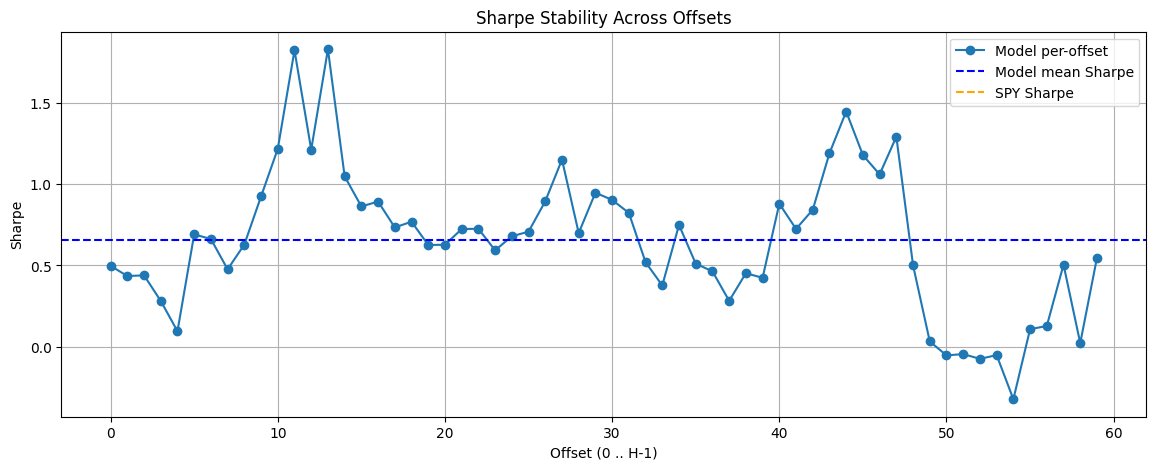

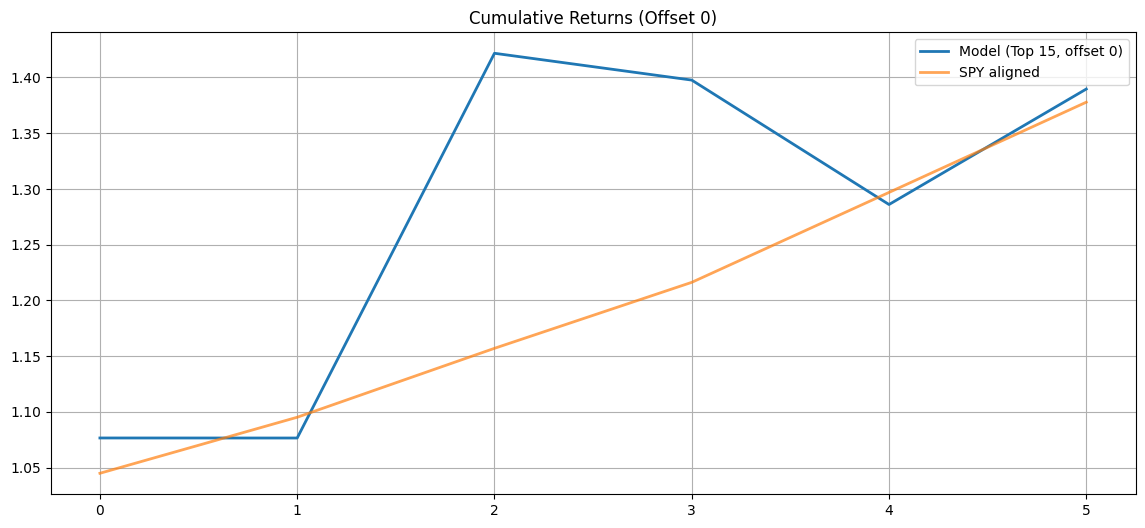

In [33]:
# ============================================================
# 8) DAILY FORWARD SHARPE + RETURN STABILITY + CUM RETURN
# ============================================================

print("\n===== DAILY FORWARD SHARPE + RETURN STABILITY =====")

# ========================
# CONFIG FOR THIS EVAL
# ========================
TOP_K = 15     # <-- SET NUMBER OF STOCKS RIGHT HERE
H     = HORIZON


# ========================
# Helpers
# ========================
def compute_sharpe(r):
    r = np.array(r)
    if len(r) < 2:
        return np.nan
    return r.mean() / (r.std() + 1e-12)


# ============================================================
# PREP MODEL DATA
# ============================================================

df_daily = pd.DataFrame({
    "date": dates_test,
    "stock_id": ids_test,
    "y_pred": rank_pred_test,
    "true_return": y[test_mask]
}).dropna().reset_index(drop=True)

df_daily["date"] = pd.to_datetime(df_daily["date"])
df_daily["ticker"] = np.array(tickers)[df_daily["stock_id"].values]
df_daily = df_daily.sort_values(["date", "y_pred"], ascending=[True, False])

unique_test_dates = np.sort(df_daily["date"].unique())


# ============================================================
# PREP SPY RETURNS ALIGNED WITH MODEL DATES
# ============================================================

spy_aligned = []
spy_dates_used = []

for d in unique_test_dates:
    if d in spy.index:
        idx0 = spy.index.get_loc(d)
        idx1 = idx0 + H
        if idx1 < len(spy):
            spy_aligned.append(float(spy["ret"].iloc[idx1]))
            spy_dates_used.append(d)

spy_aligned = np.array(spy_aligned)
spy_dates_used = np.array(spy_dates_used)


# ============================================================
# LOOP OVER OFFSETS FOR SHARPE
# ============================================================

offset_sharpe_model = []
offset_mean_model   = []
offset_std_model    = []

# Also track the returns for offset = 0 for cumulative curve
model_returns_offset0 = []

for offset in range(H):

    model_period_ret = []

    i = offset
    while i < len(unique_test_dates):

        t0 = unique_test_dates[i]
        idx1 = i + H
        if idx1 >= len(unique_test_dates):
            break

        df_t = df_daily[df_daily["date"] == t0].head(TOP_K)
        realized = float(df_t["true_return"].mean())
        model_period_ret.append(realized)

        # Save offset 0 returns for cumulative return plot
        if offset == 0:
            model_returns_offset0.append(realized)

        i += H

    model_period_ret = np.array(model_period_ret)

    offset_mean_model.append(model_period_ret.mean())
    offset_std_model.append(model_period_ret.std())
    offset_sharpe_model.append(compute_sharpe(model_period_ret))


offset_mean_model   = np.array(offset_mean_model)
offset_std_model    = np.array(offset_std_model)
offset_sharpe_model = np.array(offset_sharpe_model)


# ============================================================
# PRINT MODEL RESULTS
# ============================================================

print("\n--- MODEL PERFORMANCE STABILITY ---")
print("Mean return (avg across offsets):", np.nanmean(offset_mean_model))
print("Std of returns (avg across offsets):", np.nanmean(offset_std_model))
print("Mean Sharpe:", np.nanmean(offset_sharpe_model))
print("Std Sharpe :", np.nanstd(offset_sharpe_model))
print("Sharpe min :", np.nanmin(offset_sharpe_model))
print("Sharpe max :", np.nanmax(offset_sharpe_model))
print("Stability (Sharpe mean/std):",
      np.nanmean(offset_sharpe_model) / (np.nanstd(offset_sharpe_model) + 1e-12))


# ============================================================
# PRINT SPY BASELINE
# ============================================================

print("\n--- SPY BASELINE (ALIGNED) ---")
print("SPY mean return:", np.nanmean(spy_aligned))
print("SPY std return :", np.nanstd(spy_aligned))
print("SPY Sharpe     :", compute_sharpe(spy_aligned))


# ============================================================
# BUILD CUMULATIVE RETURNS (OFFSET 0)
# ============================================================

model_returns_offset0 = np.array(model_returns_offset0)
model_cum = (1 + model_returns_offset0).cumprod()

# SPY cumulative aligned to PARTICIPATING dates only
spy_cum = (1 + spy_aligned[:len(model_cum)]).cumprod()


# ============================================================
# PRINT CUM RETURNS
# ============================================================

print("\n===== CUMULATIVE RETURNS (OFFSET 0) =====")
print("Model cumulative return:", model_cum[-1])
print("SPY cumulative return:  ", spy_cum[-1])


# ============================================================
# PLOT SHARPE VS OFFSET
# ============================================================

plt.figure(figsize=(14,5))
plt.plot(offset_sharpe_model, marker="o", label="Model per-offset")
plt.axhline(np.nanmean(offset_sharpe_model), color="blue", linestyle="--", label="Model mean Sharpe")
plt.axhline(compute_sharpe(spy_aligned), color="orange", linestyle="--", label="SPY Sharpe")
plt.title("Sharpe Stability Across Offsets")
plt.xlabel("Offset (0 .. H-1)")
plt.ylabel("Sharpe")
plt.grid(True)
plt.legend()
plt.show()


# ============================================================
# PLOT CUMULATIVE RETURNS
# ============================================================

plt.figure(figsize=(14,6))
plt.plot(model_cum, label=f"Model (Top {TOP_K}, offset 0)", linewidth=2)
plt.plot(spy_cum, label="SPY aligned", linewidth=2, alpha=0.7)
plt.title("Cumulative Returns (Offset 0)")
plt.grid(True)
plt.legend()
plt.show()


Test period: 2024-01-02 → 2025-09-02
SPY cumulative return: 1.3905146568476052
SPY percent gain: 39.05146568476052 %


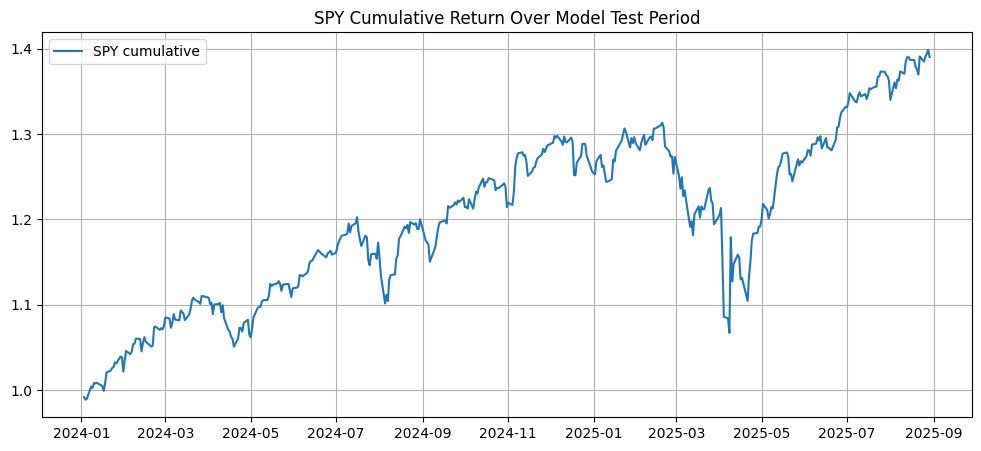

In [34]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# --------------------------------
# 1) EXTRACT SPY DATA FOR TEST RANGE
# --------------------------------
start = pd.to_datetime(dates_test).min()
end   = pd.to_datetime(dates_test).max() + pd.Timedelta(days=5)

spy = yf.download("SPY", start=start, end=end, auto_adjust=True, progress=False)

# --------------------------------
# 2) DAILY RETURNS
# --------------------------------
spy["daily_ret"] = spy["Close"].pct_change()
spy["cum_ret"] = (1 + spy["daily_ret"]).cumprod()

# --------------------------------
# 3) PRINT SUMMARY
# --------------------------------
print("Test period:", start.date(), "→", end.date())
print("SPY cumulative return:", float(spy['cum_ret'].iloc[-1]))
print("SPY percent gain:", (spy['cum_ret'].iloc[-1] - 1) * 100, "%")

# --------------------------------
# 4) PLOT
# --------------------------------
plt.figure(figsize=(12,5))
plt.plot(spy.index, spy["cum_ret"], label="SPY cumulative")
plt.title("SPY Cumulative Return Over Model Test Period")
plt.grid(True)
plt.legend()
plt.show()
